In [1]:
import math
import numpy as numpy

In [2]:
Dd= 0.1143  #Drillbit Radius in m
Da= 0.1809  #Annulus Radius in m
An= 7.49*(10**-4) #Nozzle Radius in m
n=3        #No of nozzles
H= 2000    #Length of Wellbore in m
Qd= 0.03   #Flowrate through drillbit in m^3/sec
Mu= 0.4  #Viscosity in Pa-s 
d= 780     #Density in Kg/m^3
Pa= 10**5 #Atmospheric Pressure in Pa
Kc=2.85*(10**-3) 
Zci=0.5
Cd=0.8
b=6.89660000*(10**8) #bulk modulus in Pa
Kp= 5*(10**-12)     #Permeability in m2
Re= 100           #Reservoir Extent in m
Rw=0.1143         #Wellbore Radius in m

In [3]:
Ad=3.14*(Dd**2)/4
print("Ad=", Ad)
print("\n")
Aa=3.14*(Da**2)/4
print("Aa=", Aa)
print("\n")
#An=n*3.14*(Dn)/4
#print("An=", An)
#print("\n")
J=32*Mu*H*((1/(Ad*(Dd**2)))+ (1/(Aa*(Da**2))))
print("J=", J)
print("\n")
K= d/(2*(Cd**2)*(An**2))
print("K=", K)
print("\n")
Vd=Ad*H
print("Vd=", Vd)
print("\n")
Va=Aa*H
print("Va=", Va)
print("\n")
Md= d*H/Ad
print("Md=", Md)
print("\n")



Ad= 0.01025562465


Aa= 0.02568897585


J= 221518884.46009713


K= 1086228010.2887511


Vd= 20.5112493


Va= 51.3779517


Md= 152111651.2391081




In [4]:
#Steady State Calculations
M=6.28*Kp*H*Mu/((numpy.log(Re/Rw))-0.5)
C= (32*Mu*H*Qd/Aa) + d*H*9.81
#Solving Quadratic
R1=M**2
print("R1=", R1)
print("\n")
R2=2*C*(M**2) + 2*Qd*M - 2*(Kc**2)*(Zci**2)/d
print("R2=", R2)
print("\n")
R3= (Qd**2)+ (M**2)*(C**2) + 2*Qd*M*C+ 2*(Kc**2)*(Zci**2)*Pa/d
print("R3=", R3)
print("\n")
det=(R2**2)- 4*R1*R2
print("det=", det)
print("\n")
Pc= ((math.sqrt(det))-R2)/(2*R1)
print("Pc=", Pc)
print("\n")

R1= 1.6030111764949383e-17


R2= -4.474909724927269e-09


R3= 0.008873110800665272


det= 2.0024817333181854e-17


Pc= 279156490.39590526




In [5]:
#Steady State Calculations
Pp=Pc+ J*Qd +K*(Qd**2)+ 32*Mu*H*M*(Pc+C)/(Aa*Da*Da)
print("Pp=", Pp)
print("\n")
Qp=Qd
print("Qp=", Qp)
print("\n")

Pp= 322684655.305373


Qp= 0.03




In [6]:
Ppm=[Pp]  #Pp value storing matrix
Pcm=[Pc]  #Pc value storing matrix
Qdm=[Qd]  #Qd value storing matrix
dt=0.1  #Measurement frequency
T=[0]

In [7]:
t=0

#Iteration
while t<601:
    if t<301:
        Zc=0.5
    #elif t>20 and t<41:
        #Zc=0.9
    else:
        Zc=0.3
    Ppn= (((Qp-Qd)*b*dt/Vd)) + Pp
    x= Pc- Pa
    print("X=", x)
    y= math.sqrt(x)
    G=math.sqrt(2/d)
    Pcn= (Qd +M*(Pc+(32*Mu*H*Qd)/(Aa*(Da**2))+d*H*9.81)- (Kc*Zc*G*y))*b*dt/Va + Pc 
    Qdn= (Ppn-Pcn - (J*Qd)-(32*Mu*H)*(M*(Pcn+ d*H*9.81+(32*Mu*H*Qd))/(Aa*(Da**2))) - (K*Qd**2))*dt/Md + Qd
    Ppm.append(Ppn)
    Pcm.append(Pcn)
    Qdm.append(Qdn)
    Pp=Ppn
    print("Pp=", Pp)
    Pc=Pcn
    print("Pc=", Pc)
    Qd=Qdn
    print("Qd=",Qd)
    t=t+dt
    print("t=",t)
    T.append(t)

X= 279056490.39590526
Pp= 322684655.305373
Pc= 279166172.55916125
Qd= 0.029995193488214382
t= 0.1
X= 279066172.55916125
Pp= 322684671.46654814
Pc= 279175871.44986105
Qd= 0.029984149937653054
t= 0.2
X= 279075871.44986105
Pp= 322684724.760006
Pc= 279185577.71699995
Qd= 0.02996806371172506
t= 0.30000000000000004
X= 279085577.71699995
Pp= 322684832.1409863
Pc= 279195283.78512365
Qd= 0.029947920557985997
t= 0.4
X= 279095283.78512365
Pp= 322685007.2503005
Pc= 279204983.54454917
Qd= 0.029924533633491714
t= 0.5
X= 279104983.54454917
Pp= 322685260.9946413
Pc= 279214672.09507275
Qd= 0.02989857335617325
t= 0.6
X= 279114672.09507275
Pp= 322685602.0265217
Pc= 279224345.5339995
Qd= 0.02987059212466419
t= 0.7
X= 279124345.5339995
Pp= 322686037.14109707
Pc= 279234000.7808763
Qd= 0.029841044778415635
t= 0.7999999999999999
X= 279134000.7808763
Pp= 322686571.60419345
Pc= 279243635.4326037
Qd= 0.029810305525416223
t= 0.8999999999999999
X= 279143635.4326037
Pp= 322687209.4234185
Pc= 279253247.6436827
Qd= 0

t= 9.89999999999998
X= 279948003.8818265
Pp= 323087465.633744
Pc= 280056785.94099844
Qd= 0.027924811465529376
t= 9.99999999999998
X= 279956785.94099844
Pp= 323094443.1440056
Pc= 280065573.45317936
Qd= 0.02791408790824568
t= 10.09999999999998
X= 279965573.45317936
Pp= 323101456.71062046
Pc= 280074366.608282
Qd= 0.027903478908324546
t= 10.19999999999998
X= 279974366.608282
Pp= 323108505.9484067
Pc= 280083165.5932219
Qd= 0.027892982203874626
t= 10.29999999999998
X= 279983165.5932219
Pp= 323115590.4797876
Pc= 280091970.5919725
Qd= 0.027882595573804212
t= 10.399999999999979
X= 279991970.5919725
Pp= 323122709.9346546
Pc= 280100781.7856192
Qd= 0.027872316837104165
t= 10.499999999999979
X= 280000781.7856192
Pp= 323129863.9502324
Pc= 280109599.35241306
Qd= 0.027862143852142234
t= 10.599999999999978
X= 280009599.35241306
Pp= 323137052.1709466
Pc= 280118423.46782255
Qd= 0.027852074515969272
t= 10.699999999999978
X= 280018423.46782255
Pp= 323144274.24829376
Pc= 280127254.30458534
Qd= 0.02784210676

Qd= 0.02698378582386789
t= 23.20000000000006
X= 281212041.5250941
Pp= 324247550.50851905
Pc= 281322528.85214835
Qd= 0.026977982587088684
t= 23.30000000000006
X= 281222528.85214835
Pp= 324257711.58890235
Pc= 281333033.51536024
Qd= 0.026972180245142984
t= 23.400000000000063
X= 281233033.51536024
Pp= 324267892.17879033
Pc= 281343555.55974823
Qd= 0.02696637859117485
t= 23.500000000000064
X= 281243555.55974823
Pp= 324278092.2758698
Pc= 281354095.03013396
Qd= 0.02696057742186238
t= 23.600000000000065
X= 281254095.03013396
Pp= 324288311.87851113
Pc= 281364651.9711472
Qd= 0.026954776537351042
t= 23.700000000000067
X= 281264651.9711472
Pp= 324298550.9857568
Pc= 281375226.4272303
Qd= 0.026948975741188475
t= 23.800000000000068
X= 281275226.4272303
Pp= 324308809.5973097
Pc= 281385818.44264334
Qd= 0.026943174840260157
t= 23.90000000000007
X= 281285818.44264334
Pp= 324319087.7135221
Pc= 281396428.0614683
Qd= 0.02693737364472657
t= 24.00000000000007
X= 281296428.0614683
Pp= 324329385.33538455
Pc= 281

X= 282854207.410551
Pp= 325852980.22221905
Pc= 282967497.53634816
Qd= 0.02612233537458631
t= 37.20000000000026
X= 282867497.53634816
Pp= 325866018.2880455
Pc= 282980810.63752854
Qd= 0.026115563919965293
t= 37.30000000000026
X= 282880810.63752854
Pp= 325879079.1218727
Pc= 282994146.75552994
Qd= 0.02610878128617363
t= 37.40000000000026
X= 282894146.75552994
Pp= 325892162.76128894
Pc= 283007505.9318452
Qd= 0.026101987438269345
t= 37.50000000000026
X= 282907505.9318452
Pp= 325905269.24399996
Pc= 283020888.20802265
Qd= 0.02609518234152041
t= 37.600000000000264
X= 282920888.20802265
Pp= 325918398.6078284
Pc= 283034293.62566674
Qd= 0.026088365961399962
t= 37.700000000000266
X= 282934293.62566674
Pp= 325931550.8907128
Pc= 283047722.2264382
Qd= 0.026081538263581495
t= 37.80000000000027
X= 282947722.2264382
Pp= 325944726.13070726
Pc= 283061174.0520549
Qd= 0.026074699213934262
t= 37.90000000000027
X= 282961174.0520549
Pp= 325957924.3659806
Pc= 283074649.1442919
Qd= 0.026067848778518667
t= 38.0000

Qd= 0.02552711689893546
t= 45.400000000000375
X= 284039393.615975
Pp= 327016273.31633407
Pc= 284154737.5100245
Qd= 0.025519324804155193
t= 45.50000000000038
X= 284054737.5100245
Pp= 327031338.91477895
Pc= 284170108.04171693
Qd= 0.025511519053779453
t= 45.60000000000038
X= 284070108.04171693
Pp= 327046430.75888896
Pc= 284185505.2582973
Qd= 0.02550369961968778
t= 45.70000000000038
X= 284085505.2582973
Pp= 327061548.8946735
Pc= 284200929.2070925
Qd= 0.025495866473762972
t= 45.80000000000038
X= 284100929.2070925
Pp= 327076693.36823666
Pc= 284216379.9355116
Qd= 0.025488019587890026
t= 45.90000000000038
X= 284116379.9355116
Pp= 327091864.22577685
Pc= 284231857.4910459
Qd= 0.025480158933955045
t= 46.000000000000384
X= 284131857.4910459
Pp= 327107061.5135872
Pc= 284247361.92126954
Qd= 0.025472284483844147
t= 46.100000000000385
X= 284147361.92126954
Pp= 327122285.27805513
Pc= 284262893.27383935
Qd= 0.025464396209442436
t= 46.20000000000039
X= 284162893.27383935
Pp= 327137535.5656629
Pc= 2842784

t= 60.50000000000059
X= 286686406.73350483
Pp= 329616293.4420137
Pc= 286806358.5936585
Qd= 0.024169446220558166
t= 60.60000000000059
X= 286706358.5936585
Pp= 329635897.8047744
Pc= 286826345.2753922
Qd= 0.02415924189748114
t= 60.70000000000059
X= 286726345.2753922
Pp= 329655536.4780413
Pc= 286846366.8407651
Qd= 0.024149019294424826
t= 60.800000000000594
X= 286746366.8407651
Pp= 329675209.523278
Pc= 286866423.3519511
Qd= 0.024138778377001464
t= 60.900000000000595
X= 286766423.3519511
Pp= 329694917.0020639
Pc= 286886514.8712388
Qd= 0.02412851911075715
t= 61.0000000000006
X= 286786514.8712388
Pp= 329714658.97609407
Pc= 286906641.4610318
Qd= 0.02411824146117165
t= 61.1000000000006
X= 286806641.4610318
Pp= 329734435.5071798
Pc= 286926803.1838489
Qd= 0.024107945393658136
t= 61.2000000000006
X= 286826803.1838489
Pp= 329754246.6572486
Pc= 286947000.1023245
Qd= 0.02409763087356307
t= 61.3000000000006
X= 286847000.1023245
Pp= 329774092.48834455
Pc= 286967232.2792086
Qd= 0.02408729786616588
t= 61.

t= 74.00000000000007
X= 289721353.418889
Pp= 332599479.8334227
Pc= 289846616.6527331
Qd= 0.022611785444409768
t= 74.10000000000007
X= 289746616.6527331
Pp= 332624321.5969637
Pc= 289871924.2205932
Qd= 0.022598773091869164
t= 74.20000000000006
X= 289771924.2205932
Pp= 332649207.1125888
Pc= 289897276.2022637
Qd= 0.0225857371378793
t= 74.30000000000005
X= 289797276.2022637
Pp= 332674136.45965445
Pc= 289922672.677689
Qd= 0.022572677537295076
t= 74.40000000000005
X= 289822672.677689
Pp= 332699109.71766865
Pc= 289948113.72696394
Qd= 0.02255959424487748
t= 74.50000000000004
X= 289848113.72696394
Pp= 332724126.9662917
Pc= 289973599.4303341
Qd= 0.02254648721529341
t= 74.60000000000004
X= 289873599.4303341
Pp= 332749188.2853363
Pc= 289999129.86819595
Qd= 0.022533356403115466
t= 74.70000000000003
X= 289899129.86819595
Pp= 332774293.7547678
Pc= 290024705.1210975
Qd= 0.02252020176282161
t= 74.80000000000003
X= 289924705.1210975
Pp= 332799443.45470464
Pc= 290050325.2697382
Qd= 0.022507023248795114
t=

Pp= 337453462.692084
Pc= 294788534.3052537
Qd= 0.02005632720681933
t= 90.89999999999911
X= 294688534.3052537
Pp= 337486896.8007443
Pc= 294822552.08254164
Qd= 0.020038635792975216
t= 90.9999999999991
X= 294722552.08254164
Pp= 337520390.3941307
Pc= 294856630.07333
Qd= 0.020020911681528707
t= 91.0999999999991
X= 294756630.07333
Pp= 337553943.582184
Pc= 294890768.3876707
Qd= 0.02000315480790027
t= 91.1999999999991
X= 294790768.3876707
Pp= 337587556.4750622
Pc= 294924967.1358282
Qd= 0.019985365107368987
t= 91.29999999999909
X= 294824967.1358282
Pp= 337621229.18314075
Pc= 294959226.4282795
Qd= 0.01996754251507225
t= 91.39999999999908
X= 294859226.4282795
Pp= 337654961.8170133
Pc= 294993546.3757149
Qd= 0.01994968696600533
t= 91.49999999999908
X= 294893546.3757149
Pp= 337688754.4874921
Pc= 295027927.08903813
Qd= 0.01993179839502111
t= 91.59999999999907
X= 294927927.08903813
Pp= 337722607.3056083
Pc= 295062368.6793672
Qd= 0.019913876736829633
t= 91.69999999999906
X= 294962368.6793672
Pp= 337756

Pc= 298957852.74369985
Qd= 0.017877742222129716
t= 101.99999999999848
X= 298857852.74369985
Pp= 341594312.9802968
Pc= 298999275.96519285
Qd= 0.017855993498594628
t= 102.09999999999847
X= 298899275.96519285
Pp= 341635145.3810992
Pc= 299040773.0166951
Qd= 0.017834203960922508
t= 102.19999999999847
X= 298940773.0166951
Pp= 341676051.0459546
Pc= 299082344.03477
Qd= 0.017812373526430426
t= 102.29999999999846
X= 298982344.03477
Pp= 341717030.11237234
Pc= 299123989.1562494
Qd= 0.0177905021122477
t= 102.39999999999846
X= 299023989.1562494
Pp= 341758082.71814054
Pc= 299165708.5182339
Qd= 0.01776858963531539
t= 102.49999999999845
X= 299065708.5182339
Pp= 341799209.00132656
Pc= 299207502.2580936
Qd= 0.017746636012385814
t= 102.59999999999845
X= 299107502.2580936
Pp= 341840409.1002776
Pc= 299249370.5134686
Qd= 0.017724641160022026
t= 102.69999999999844
X= 299149370.5134686
Pp= 341881683.1536215
Pc= 299291313.42226976
Qd= 0.017702604994597332
t= 102.79999999999843
X= 299191313.42226976
Pp= 34192303

Pp= 345868920.8096714
Pc= 303340760.6673052
Qd= 0.01556521080315452
t= 111.69999999999793
X= 303240760.6673052
Pp= 345917455.62377214
Pc= 303390022.876697
Qd= 0.015539088645704989
t= 111.79999999999792
X= 303290022.876697
Pp= 345966078.2697102
Pc= 303439373.50147384
Qd= 0.015512916701562771
t= 111.89999999999792
X= 303339373.50147384
Pp= 346014788.91488576
Pc= 303488812.70710665
Qd= 0.015486694867301698
t= 111.99999999999791
X= 303388812.70710665
Pp= 346063587.7270469
Pc= 303538340.65939724
Qd= 0.015460423039252255
t= 112.0999999999979
X= 303438340.65939724
Pp= 346112474.8742903
Pc= 303587957.52447873
Qd= 0.015434101113501108
t= 112.1999999999979
X= 303487957.52447873
Pp= 346161450.5250619
Pc= 303637663.4688166
Qd= 0.015407728985890247
t= 112.2999999999979
X= 303537663.4688166
Pp= 346210514.84815794
Pc= 303687458.659209
Qd= 0.015381306552016432
t= 112.39999999999789
X= 303587458.659209
Pp= 346259668.0127257
Pc= 303737343.262788
Qd= 0.015354833707230488
t= 112.49999999999788
X= 30363734

Qd= 0.01306393344193699
t= 120.49999999999743
X= 307933247.7729406
Pp= 350552363.7723454
Pc= 308090962.0045492
Qd= 0.01303300581010798
t= 120.59999999999742
X= 307990962.0045492
Pp= 350609412.74601763
Pc= 308148780.56237215
Qd= 0.013002018280782422
t= 120.69999999999742
X= 308048780.56237215
Pp= 350666565.9106105
Pc= 308206703.64394456
Qd= 0.012970970726335412
t= 120.79999999999741
X= 308106703.64394456
Pp= 350723823.4679494
Pc= 308264731.44720286
Qd= 0.012939863018831316
t= 120.8999999999974
X= 308164731.44720286
Pp= 350781185.62029004
Pc= 308322864.1704857
Qd= 0.012908695030022987
t= 120.9999999999974
X= 308222864.1704857
Pp= 350838652.57031924
Pc= 308381102.0125345
Qd= 0.012877466631350885
t= 121.0999999999974
X= 308281102.0125345
Pp= 350896224.5211561
Pc= 308439445.17249495
Qd= 0.012846177693942085
t= 121.19999999999739
X= 308339445.17249495
Pp= 350953901.67635304
Pc= 308497893.84991735
Qd= 0.012814828088609532
t= 121.29999999999738
X= 308397893.84991735
Pp= 351011684.2398969
Pc= 3

X= 314185602.9114809
Pp= 356738996.1523384
Pc= 314354670.1240515
Qd= 0.009652752487357757
t= 130.49999999999687
X= 314254670.1240515
Pp= 356807410.72092134
Pc= 314423863.3132018
Qd= 0.009615149437773201
t= 130.59999999999687
X= 314323863.3132018
Pp= 356875951.7241197
Pc= 314493182.72085977
Qd= 0.009577472035529205
t= 130.69999999999686
X= 314393182.72085977
Pp= 356944619.41193324
Pc= 314562628.58945394
Qd= 0.009539720117051585
t= 130.79999999999686
X= 314462628.58945394
Pp= 357013414.0349116
Pc= 314632201.16191435
Qd= 0.009501893518350924
t= 130.89999999999685
X= 314532201.16191435
Pp= 357082335.8441557
Pc= 314701900.68167377
Qd= 0.009463992075021336
t= 130.99999999999685
X= 314601900.68167377
Pp= 357151385.09131956
Pc= 314771727.39266896
Qd= 0.009426015622239138
t= 131.09999999999684
X= 314671727.39266896
Pp= 357220562.02861106
Pc= 314841681.53934157
Qd= 0.00938796399476169
t= 131.19999999999683
X= 314741681.53934157
Pp= 357289866.9087939
Pc= 314911763.36663944
Qd= 0.00934983702692615

Pc= 321857078.631794
Qd= 0.005542052683099514
t= 140.3999999999963
X= 321757078.631794
Pp= 364248996.2695609
Pc= 321940026.6019599
Qd= 0.005496225107048861
t= 140.4999999999963
X= 321840026.6019599
Pp= 364331386.53816664
Pc= 322023127.4121016
Qd= 0.005450304758644011
t= 140.5999999999963
X= 321923127.4121016
Pp= 364413931.20705795
Pc= 322106381.36023223
Qd= 0.005404291426457057
t= 140.6999999999963
X= 322006381.36023223
Pp= 364496630.5888788
Pc= 322189788.7449922
Qd= 0.005358184898498518
t= 140.7999999999963
X= 322089788.7449922
Pp= 364579484.996986
Pc= 322273349.865651
Qd= 0.005311984962215528
t= 140.89999999999628
X= 322173349.865651
Pp= 364662494.745451
Pc= 322357065.02210844
Qd= 0.00526569140449018
t= 140.99999999999628
X= 322257065.02210844
Pp= 364745660.14906186
Pc= 322440934.51489604
Qd= 0.005219304011637704
t= 141.09999999999627
X= 322340934.51489604
Pp= 364828981.52332515
Pc= 322524958.64517856
Qd= 0.005172822569404678
t= 141.19999999999627
X= 322424958.64517856
Pp= 364912459.

Pc= 334036051.6945082
Qd= -0.0012759932567135857
t= 153.39999999999557
X= 333936051.6945082
Pp= 376374905.5941195
Pc= 334141609.3932572
Qd= -0.0013358769983279216
t= 153.49999999999557
X= 334041609.3932572
Pp= 376480267.78154445
Pc= 334247364.48542
Qd= -0.0013958864189048046
t= 153.59999999999556
X= 334147364.48542
Pp= 376585831.74164736
Pc= 334353317.3638148
Qd= -0.0014560218203165927
t= 153.69999999999555
X= 334253317.3638148
Pp= 376691597.8980199
Pc= 334459468.42210305
Qd= -0.0015162835052923084
t= 153.79999999999555
X= 334359468.42210305
Pp= 376797566.67527163
Pc= 334565818.0547914
Qd= -0.0015766717774204323
t= 153.89999999999554
X= 334465818.0547914
Pp= 376903738.49903286
Pc= 334672366.65723354
Qd= -0.0016371869411518872
t= 153.99999999999554
X= 334572366.65723354
Pp= 377010113.7959575
Pc= 334779114.6256322
Qd= -0.0016978293018030213
t= 154.09999999999553
X= 334679114.6256322
Pp= 377116692.9937262
Pc= 334886062.35704106
Qd= -0.0017585991655583802
t= 154.19999999999553
X= 334786062

X= 346303834.59527737
Pp= 388753248.8324284
Pc= 346532674.6361449
Qd= -0.008460947787154468
t= 164.09999999999496
X= 346432674.6361449
Pp= 388882568.0019384
Pc= 346661758.7917201
Qd= -0.008536177440195643
t= 164.19999999999496
X= 346561758.7917201
Pp= 389012140.11987567
Pc= 346791087.5556624
Qd= -0.008611570572978913
t= 164.29999999999495
X= 346691087.5556624
Pp= 389141965.7359163
Pc= 346920661.42270064
Qd= -0.008687127598131752
t= 164.39999999999495
X= 346820661.42270064
Pp= 389272045.4011239
Pc= 347050480.8886357
Qd= -0.008762848929528118
t= 164.49999999999494
X= 346950480.8886357
Pp= 389402379.66795343
Pc= 347180546.45034254
Qd= -0.008838734982292972
t= 164.59999999999494
X= 347080546.45034254
Pp= 389532969.0902559
Pc= 347310858.6057728
Qd= -0.008914786172806805
t= 164.69999999999493
X= 347210858.6057728
Pp= 389663814.2232822
Pc= 347441417.85395706
Qd= -0.008991002918710293
t= 164.79999999999492
X= 347341417.85395706
Pp= 389794915.6236875
Pc= 347572224.69500726
Qd= -0.00906738563890

t= 178.69999999999413
X= 368140242.0681316
Pp= 410791010.2116424
Pc= 368410865.4057991
Qd= -0.02151401604946553
t= 178.79999999999413
X= 368310865.4057991
Pp= 410964218.3658072
Pc= 368581818.20231295
Qd= -0.021618449063279813
t= 178.89999999999412
X= 368481818.20231295
Pp= 411137777.66032064
Pc= 368753101.13590395
Qd= -0.02172312239873781
t= 178.99999999999412
X= 368653101.13590395
Pp= 411311688.9032283
Pc= 368924714.8862589
Qd= -0.021828036713624602
t= 179.0999999999941
X= 368824714.8862589
Pp= 411485952.90478724
Pc= 369096660.13452333
Qd= -0.02193319266793429
t= 179.1999999999941
X= 368996660.13452333
Pp= 411660570.4774739
Pc= 369268937.5633045
Qd= -0.022038590923879237
t= 179.2999999999941
X= 369168937.5633045
Pp= 411835542.43599117
Pc= 369441547.856674
Qd= -0.02214423214589946
t= 179.3999999999941
X= 369341547.856674
Pp= 412010869.597276
Pc= 369614491.700171
Qd= -0.02225011700067202
t= 179.4999999999941
X= 369514491.700171
Pp= 412186552.78050697
Pc= 369787769.7808045
Qd= -0.0223562

t= 188.49999999999358
X= 386535854.4187479
Pp= 429565808.93213767
Pc= 386842219.9916607
Qd= -0.032999413923085974
t= 188.59999999999357
X= 386742219.9916607
Pp= 429777635.01435584
Pc= 387048988.83829176
Qd= -0.03313089819348169
t= 188.69999999999357
X= 386948988.83829176
Pp= 429989903.1927165
Pc= 387256161.79285735
Qd= -0.033262699365770323
t= 188.79999999999356
X= 387156161.79285735
Pp= 430202614.53275466
Pc= 387463739.69129926
Qd= -0.033394818367376095
t= 188.89999999999355
X= 387363739.69129926
Pp= 430415770.1031238
Pc= 387671723.3712874
Qd= -0.03352725612914423
t= 188.99999999999355
X= 387571723.3712874
Pp= 430629370.9756071
Pc= 387880113.67222226
Qd= -0.03366001358535729
t= 189.09999999999354
X= 387780113.67222226
Pp= 430843418.22512925
Pc= 388088911.4352375
Qd= -0.03379309167375187
t= 189.19999999999354
X= 387988911.4352375
Pp= 431057912.92976785
Pc= 388298117.50320244
Qd= -0.03392649133553507
t= 189.29999999999353
X= 388198117.50320244
Pp= 431272856.1707652
Pc= 388507732.7207243

Qd= -0.04638484931916662
t= 197.69999999999305
X= 407319289.3240171
Pp= 451047554.3837979
Pc= 407666471.27711004
Qd= -0.04654943455345838
t= 197.79999999999305
X= 407566471.27711004
Pp= 451304940.3784878
Pc= 407914140.75715613
Qd= -0.0467144374211693
t= 197.89999999999304
X= 407814140.75715613
Pp= 451562881.1705774
Pc= 408162298.76598805
Qd= -0.046879859244097925
t= 197.99999999999304
X= 408062298.76598805
Pp= 451821378.1687407
Pc= 408410946.3073314
Qd= -0.04704570134953564
t= 198.09999999999303
X= 408310946.3073314
Pp= 452080432.7861146
Pc= 408660084.3868053
Qd= -0.04721196507029807
t= 198.19999999999303
X= 408560084.3868053
Pp= 452340046.4403174
Pc= 408909714.0119232
Qd= -0.047378651744756806
t= 198.29999999999302
X= 408809714.0119232
Pp= 452600220.5534675
Pc= 409159836.19209343
Qd= -0.047545762716871505
t= 198.399999999993
X= 409059836.19209343
Pp= 452860956.5522022
Pc= 409410451.9386197
Qd= -0.04771329933622194
t= 198.499999999993
X= 409310451.9386197
Pp= 453122255.86769646
Pc= 409

Qd= -0.07229438980292618
t= 210.8999999999923
X= 444560591.83025146
Pp= 490407549.5134181
Pc= 444981491.57441646
Qd= -0.07252807317630017
t= 210.9999999999923
X= 444881491.57441646
Pp= 490752284.7848419
Pc= 445303027.0771868
Qd= -0.07276241228989289
t= 211.0999999999923
X= 445203027.0771868
Pp= 491097807.98639476
Pc= 445625199.5743265
Qd= -0.07299740961237168
t= 211.1999999999923
X= 445525199.5743265
Pp= 491444121.33120537
Pc= 445948010.30298054
Qd= -0.07323306762619222
t= 211.29999999999228
X= 445848010.30298054
Pp= 491791227.04074925
Pc= 446271460.50166273
Qd= -0.07346938882772067
t= 211.39999999999227
X= 446171460.50166273
Pp= 492139127.34489566
Pc= 446595551.41024333
Qd= -0.07370637572735741
t= 211.49999999999227
X= 446495551.41024333
Pp= 492487824.48195463
Pc= 446920284.2699364
Qd= -0.07394403084966268
t= 211.59999999999226
X= 446820284.2699364
Pp= 492837320.6987247
Pc= 447245660.32328683
Qd= -0.07418235673348365
t= 211.69999999999226
X= 447145660.32328683
Pp= 493187618.25054085
P

Pp= 538102602.6310668
Pc= 488469151.63134336
Qd= -0.10619240898833013
t= 222.99999999999162
X= 488369151.63134336
Pp= 538560529.1835119
Pc= 488876183.4934563
Qd= -0.10652889167834738
t= 223.0999999999916
X= 488776183.4934563
Pp= 539019587.1085447
Pc= 489284004.3369537
Qd= -0.10686648944931192
t= 223.1999999999916
X= 489184004.3369537
Pp= 539479780.1554579
Pc= 489692615.3664678
Qd= -0.10720520837334695
t= 223.2999999999916
X= 489592615.3664678
Pp= 539941112.0939603
Pc= 490102017.78301936
Qd= -0.10754505458850037
t= 223.3999999999916
X= 490002017.78301936
Pp= 540403586.7143995
Pc= 490512212.78391147
Qd= -0.10788603430007578
t= 223.4999999999916
X= 490412212.78391147
Pp= 540867207.8279871
Pc= 490923201.56262016
Qd= -0.10822815378200375
t= 223.59999999999158
X= 490823201.56262016
Pp= 541331979.26703
Pc= 491334985.30868316
Qd= -0.10857141937825485
t= 223.69999999999158
X= 491234985.30868316
Pp= 541797904.8851658
Pc= 491747565.2075859
Qd= -0.10891583750429604
t= 223.79999999999157
X= 4916475

Pc= 535212807.51919115
Qd= -0.14882969713658412
t= 233.39999999999102
X= 535112807.51919115
Pp= 593197353.7239453
Pc= 535706748.14065593
Qd= -0.1493432833649672
t= 233.49999999999102
X= 535606748.14065593
Pp= 593800368.620778
Pc= 536201536.0590711
Qd= -0.1498599400321685
t= 233.599999999991
X= 536101536.0590711
Pp= 594405120.6981786
Pc= 536697169.90843856
Qd= -0.15037973574814328
t= 233.699999999991
X= 536597169.90843856
Pp= 595011620.5107281
Pc= 537193648.2167423
Qd= -0.15090274263910444
t= 233.799999999991
X= 537093648.2167423
Pp= 595619878.8555208
Pc= 537690969.4002982
Qd= -0.15142903659681903
t= 233.899999999991
X= 537590969.4002982
Pp= 596229906.7848258
Pc= 538189131.75771
Qd= -0.15195869754905772
t= 233.999999999991
X= 538089131.75771
Pp= 596841715.6196572
Pc= 538688133.4633964
Qd= -0.15249180975324544
t= 234.09999999999098
X= 538588133.4633964
Pp= 597455316.9643321
Pc= 539187972.5606551
Qd= -0.15302846211558266
t= 234.19999999999098
X= 539087972.5606551
Pp= 598070722.7221014
Pc=

Pc= 573908946.5412557
Qd= -0.24018553720032804
t= 240.8999999999906
X= 573808946.5412557
Pp= 645398923.7620442
Pc= 574393674.0696547
Qd= -0.24698930126293206
t= 240.9999999999906
X= 574293674.0696547
Pp= 646330258.7515174
Pc= 574869780.5278615
Qd= -0.2549080832213745
t= 241.0999999999906
X= 574769780.5278615
Pp= 647288219.4578624
Pc= 575335558.2093577
Qd= -0.26422553731830256
t= 241.19999999999058
X= 575235558.2093577
Pp= 648277508.7064064
Pc= 575788866.4763806
Qd= -0.2753241536700501
t= 241.29999999999058
X= 575688866.4763806
Pp= 649304115.3881363
Pc= 576226981.456502
Qd= -0.28873090814526525
t= 241.39999999999057
X= 576126981.456502
Pp= 650375800.2713748
Pc= 576646376.4852571
Qd= -0.3051901371593702
t= 241.49999999999056
X= 576546376.4852571
Pp= 651502826.8440241
Pc= 577042392.0615256
Qd= -0.32578421954979025
t= 241.59999999999056
X= 576942392.0615256
Pp= 652699097.9305186
Pc= 577408722.9472916
Qd= -0.35214215704628893
t= 241.69999999999055
X= 577308722.9472916
Pp= 653983993.6293318


ValueError: math domain error

In [ ]:
print("Ppm=", Ppm)
print("\n")
print("Pcm=", Pcm)
print("\n")
print("Qdm=", Qdm)
print("\n")

In [8]:
import matplotlib.pyplot as plt

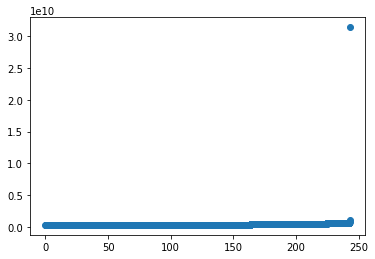

In [9]:
plt.scatter(T,Ppm)

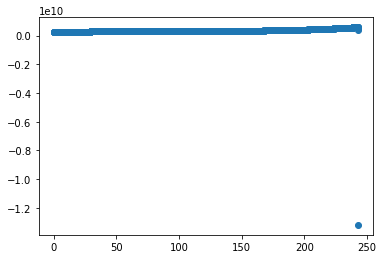

In [10]:
plt.scatter(T,Pcm)

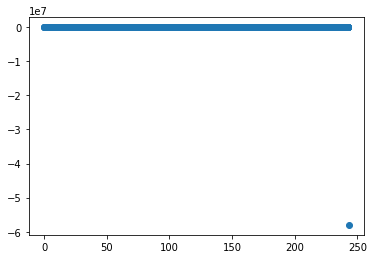

In [11]:
plt.scatter(T,Qdm)